# **Analyzing Team Performance Trends in IPL**

A Statistical and visual Exploration (2008-2023)



This project focuses on analyzing historical IPL match data to discover trends in team performances and scoring behaviors over the years.

To better understand changes over time, the data was split into two key phases: before 2018 and after 2018, highlighting a turning point in IPL's history. Various statistical methods were used to explore these changes:

- The Shapiro-Wilk test checked whether the run data followed a normal distribution.
- Linear regression helped identify scoring trends across different seasons.
- The Mann-Whitney U test compared the scoring patterns in league matches versus playoff matches.
- Cohen's d was used to measure how significant the observed differences were in practical terms.


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.utils import resample
from scipy.stats import shapiro, mannwhitneyu

In [87]:
# Load datasets
match_data = pd.read_csv('https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/IPL/match_data.csv')
match_info_data = pd.read_csv('https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/IPL/match_info_data.csv')

<ipython-input-87-1804171400>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  match_data = pd.read_csv('https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/IPL/match_data.csv')


In [88]:
match_data.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.1,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
1,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.2,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
2,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.3,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
3,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.4,Gujarat Titans,Chennai Super Kings,Shubman Gill,WP Saha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
4,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.5,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353


In [89]:
match_data.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
243812,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,14.5,Royal Challengers Bangalore,Kolkata Knight Riders,P Kumar,SB Joshi,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,335982
243813,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,14.6,Royal Challengers Bangalore,Kolkata Knight Riders,SB Joshi,P Kumar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335982
243814,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,14.7,Royal Challengers Bangalore,Kolkata Knight Riders,P Kumar,SB Joshi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335982
243815,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,15.1,Royal Challengers Bangalore,Kolkata Knight Riders,SB Joshi,P Kumar,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335982
243816,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,2,15.2,Royal Challengers Bangalore,Kolkata Knight Riders,SB Joshi,P Kumar,...,NaN,NaN,NaN,NaN,NaN,caught,SB Joshi,NaN,NaN,335982


In [90]:
match_info_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1370353,2023,Ahmedabad,2023/05/29,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan
1,1370352,2023,Ahmedabad,2023/05/26,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,Gujarat Titans,62,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,J Madanagopal
2,1370351,2023,Chennai,2023/05/24,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,normal,0,Mumbai Indians,81,0,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",BNJ Oxenford,VK Sharma,CB Gaffaney
3,1370350,2023,Chennai,2023/05/23,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,normal,0,Chennai Super Kings,15,0,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",AK Chaudhary,CB Gaffaney,BNJ Oxenford
4,1359543,2023,Mumbai,2023/05/21,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,C Green,"Wankhede Stadium, Mumbai",KN Ananthapadmanabhan,RJ Tucker,R Pandit


In [91]:
match_info_data.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1019,335986,2007/08,Kolkata,2008/04/20,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,Asad Rauf
1020,335985,2007/08,Mumbai,2008/04/20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,AV Jayaprakash
1021,335984,2007/08,Delhi,2008/04/19,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,IL Howell
1022,335983,2007/08,Chandigarh,2008/04/19,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,RB Tiffin
1023,335982,2007/08,Bangalore,2008/04/18,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,AM Saheba


In [92]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243817 entries, 0 to 243816
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                243817 non-null  int64  
 1   season                  243817 non-null  object 
 2   start_date              243817 non-null  object 
 3   venue                   243817 non-null  object 
 4   innings                 243817 non-null  int64  
 5   ball                    243817 non-null  float64
 6   batting_team            243817 non-null  object 
 7   bowling_team            243817 non-null  object 
 8   striker                 243817 non-null  object 
 9   non_striker             243817 non-null  object 
 10  bowler                  243817 non-null  object 
 11  runs_off_bat            243817 non-null  int64  
 12  extras                  243817 non-null  int64  
 13  wides                   7652 non-null    float64
 14  noballs             

In [93]:
match_info_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1024 non-null   int64 
 1   season           1024 non-null   object
 2   city             973 non-null    object
 3   date             1024 non-null   object
 4   team1            1024 non-null   object
 5   team2            1024 non-null   object
 6   toss_winner      1024 non-null   object
 7   toss_decision    1024 non-null   object
 8   result           1024 non-null   object
 9   dl_applied       1024 non-null   int64 
 10  winner           1005 non-null   object
 11  win_by_runs      1024 non-null   int64 
 12  win_by_wickets   1024 non-null   int64 
 13  player_of_match  1019 non-null   object
 14  venue            1024 non-null   object
 15  umpire1          1024 non-null   object
 16  umpire2          1024 non-null   object
 17  umpire3          1021 non-null   

In [94]:
# Enhanced Data Cleaning & Feature Engineering
match_info_data['date'] = pd.to_datetime(match_info_data['date'], errors='coerce')
team_runs_per_match = match_data.groupby(['match_id', 'batting_team'])['runs_off_bat'].sum().reset_index()
team_runs_per_match.rename(columns={'runs_off_bat': 'total_runs'}, inplace=True)
merged = pd.merge(team_runs_per_match, match_info_data[['id', 'date', 'venue', 'team1', 'team2']], left_on='match_id', right_on='id')
merged.drop(columns=['id'], inplace=True)
merged['Period'] = merged ['date'].dt.year.apply(lambda x: 'Pre' if x < 2018 else 'Post')
merged['run_rate'] = merged['total_runs'] / 20.0
merged['year'] = merged['date'].dt.year

merged.head()

,match_id,batting_team,total_runs,date,venue,team1,team2,Period,run_rate,year
0,335982,Kolkata Knight Riders,205,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Pre,10.25,2008
1,335982,Royal Challengers Bangalore,63,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Pre,3.15,2008
2,335983,Chennai Super Kings,234,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Pre,11.70,2008
3,335983,Kings XI Punjab,196,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Pre,9.80,2008
4,335984,Delhi Daredevils,122,2008-04-19,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Pre,6.10,2008


In [95]:
from scipy.stats import shapiro
# Example for post-2018 scores
stat, p = shapiro(merged[merged['Period'] == 'Post']['total_runs'])
print(f"Shapiro-Wilk Test: p = {p}")
if p>0.05 :
    print("Data is normally distributed")
else:
    print("Data is not normally distributed")

Shapiro-Wilk Test: p = 0.00028915925992835427
Data is not normally distributed


In [96]:
# Normality Tests
pre_scores = merged[merged['Period'] == 'Pre']['total_runs']
post_scores = merged[merged['Period'] == 'Post']['total_runs']
pre_normality = shapiro(pre_scores.sample(n=500, random_state=1) if len(pre_scores) > 500 else pre_scores)
post_normality = shapiro(post_scores.sample(n=500, random_state=1) if len(post_scores) > 500 else post_scores)
print("Shapiro Wilk Test (Pre):", pre_normality)
print("Shapiro-wilk Test (Post): ", post_normality)

Shapiro Wilk Test (Pre): ShapiroResult(statistic=np.float64(0.988417764270504), pvalue=np.float64(0.0005392374071367837))
Shapiro-wilk Test (Post):  ShapiroResult(statistic=np.float64(0.9845150224718922), pvalue=np.float64(3.6348381261299446e-05))


Based on the results of the Shapiro-Wilk test, we found that the run data from both before 2018 and after 2018 in the IPL does not follow this normal distribution. The very small p-values are the key here - when this p-value is really low (typically below 0.05), it's a strong sign that the data is not normally distributed.

---

In [97]:
# Distinggue betweeen playoffs and league matches
# Prepare your data
match_counts = match_info_data.groupby(match_info_data['date'].dt.year)['id'].nunique().reset_index()
match_counts.columns = ['season', 'match_count']
match_info_data['season'] = match_info_data['date'].dt.year
match_info_data['match_number'] = match_info_data.groupby('season')['date'].rank(method='first', ascending=True)
match_counts.set_index('season', inplace=True)
match_info_data['match_count'] = match_info_data['season'].map(match_counts['match_count'])
match_info_data['is_playoff'] = match_info_data['match_number'] > (match_info_data['match_count'] - 4)
merged = pd.merge(merged, match_info_data[['id', 'is_playoff']], left_on='match_id', right_on='id')
merged.drop(columns=['id'], inplace=True)
print(merged.head())

   match_id                 batting_team  total_runs       date  \
0    335982        Kolkata Knight Riders         205 2008-04-18   
1    335982  Royal Challengers Bangalore          63 2008-04-18   
2    335983          Chennai Super Kings         234 2008-04-19   
3    335983              Kings XI Punjab         196 2008-04-19   
4    335984             Delhi Daredevils         122 2008-04-19   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
2  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
3  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
4                            Feroz Shah Kotla             Delhi Daredevils   

                   team2 Period  run_rate  year  is_playoff  
0  Kolkata Knight Riders    Pre     10.25  2008       False  
1  K

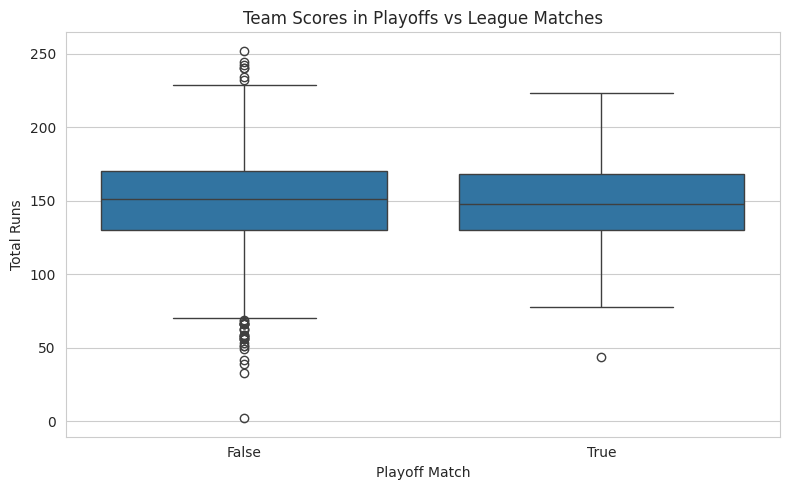

In [98]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
# Average Runs in Playoffs vs League Matches
sns.boxplot(data=merged, x='is_playoff', y='total_runs')
plt.title('Team Scores in Playoffs vs League Matches')
plt.xlabel('Playoff Match')
plt.ylabel('Total Runs')
plt.tight_layout()
plt.show()

This box plot shows us the scores in IPL matches, comparing regular league games to the playoff matches.

Here;

*   **Two Boxes:** The box on the left is for 'False', which means regular League Matches. The box on the right is for 'True', which means Playoff Matches.

*   The middle line inside each box is the average (or median) score for those types of matches. The bottom of the box is where 25% of the scores are lower than that point, and the top of the box is where 75% of the scores are lower.

*   **The "Whiskers":** The lines extending up and down from the boxes show the range of most scores. They usually go up to the highest and lowest scores that aren't considered unusual outliers.

*   **The Dots (Outliers):** Any individual dots outside the whiskers are scores that are much higher or lower than typical for that type of match.

---

Looking at this graph, we can see if playoff matches tend to have higher or lower scores than regular league matches, and also how spread out the scores are in each case. If one box is generally higher than the other, it suggests a difference in scoring patterns. If one box is much taller than the other, it means the scores in those matches vary more.


# **What is the Mann-Whitney U Test?**

The Mann-Whitney U Test is a non-parametric statistical test used to compare two independent froups when:
- The data is not normally distributed, or
- The data is ordinal(e.g.,ranks) or continuous but skewed.

This code compares the total runs scored in league matches vs playoff matches.

In [99]:
from scipy.stats import mannwhitneyu

# Choose your team
team_name = "Mumbai Indians"

# Filter only this team's matches
team_data = merged[merged['batting_team'] == team_name]

# Separate scores by match type
league_scores = team_data[team_data['is_playoff'] == False]['total_runs']
playoff_scores = team_data[team_data['is_playoff'] == True]['total_runs']

# Mann-Whitney U Test
u_statistic, p_value = mannwhitneyu(league_scores, playoff_scores, alternative='two-sided')

# Print results
print(f"Team: {team_name}")
print("Mann-Whitney U statistic: {u_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
  print("   This team shows a statistically significant scoring difference in playoffs vs league matches.")
else:
  print("   No statistically significant scoring difference for this team.")

Team: Mumbai Indians
Mann-Whitney U statistic: {u_statistic}
P-value: 0.43492719055870244
   No statistically significant scoring difference for this team.


# Mann–Whitney U Test: Each Team (Runs)
This analysis checked whether each IPL team scores differently in league matches vs playoff matches using the Mann-Whitney U test.

In [100]:
# Get unique team names
team_names = merged['batting_team'].unique()

# Iterate through each team and perform the Mann-Whitney U test
for team_name in team_names:
    # Filter only this team's matches
    team_data = merged[merged['batting_team'] == team_name]

    # Separate scores by match type
    league_scores = team_data[team_data['is_playoff'] == False]['total_runs']
    playoff_scores = team_data[team_data['is_playoff'] == True]['total_runs']

    # Check if there are enough samples in both groups
    if len(league_scores) > 0 and len(playoff_scores) > 0:
        # Mann-Whitney U Test
        u_statistic, p_value = mannwhitneyu(league_scores, playoff_scores, alternative='two-sided')

        # Print results
        print(f"\nTeam: {team_name}")
        print(f"  Mann-Whitney U Statistic: {u_statistic}")
        print(f"  P-value: {p_value}")

        if p_value < 0.05:
            print("This team shows a statistically significant scoring difference in playoffs vs league matches.")
        else:
            print("No statistically significant scoring difference for this team.")
    else:
        print(f"\nTeam: {team_name}")
        print("  Insufficient data to perform Mann-Whitney U test (need at least one league and one playoff match).")



Team: Kolkata Knight Riders
  Mann-Whitney U Statistic: 1511.0
  P-value: 0.8205743959432932
No statistically significant scoring difference for this team.

Team: Royal Challengers Bangalore
  Mann-Whitney U Statistic: 2112.0
  P-value: 0.4336911417202931
No statistically significant scoring difference for this team.

Team: Chennai Super Kings
  Mann-Whitney U Statistic: 2261.0
  P-value: 0.3326928611823903
No statistically significant scoring difference for this team.

Team: Kings XI Punjab
  Mann-Whitney U Statistic: 323.5
  P-value: 0.659111540569469
No statistically significant scoring difference for this team.

Team: Delhi Daredevils
  Mann-Whitney U Statistic: 471.0
  P-value: 0.08915100301125808
No statistically significant scoring difference for this team.

Team: Rajasthan Royals
  Mann-Whitney U Statistic: 905.0
  P-value: 0.897111248332905
No statistically significant scoring difference for this team.

Team: Mumbai Indians
  Mann-Whitney U Statistic: 2618.0
  P-value: 0.4349

In [101]:
teams = merged['batting_team'].unique()

for team in teams:
  team_data = merged[merged['batting_team'] == team]
  league_scores = team_data[team_data['is_playoff'] == False]['total_runs']
  playoff_scores = team_data[team_data['is_playoff'] == True]['total_runs']

  if len(playoff_scores) >= 3 and len(league_scores) >= 3: # avoid tiny samples
      u_stat, p_val = mannwhitneyu(league_scores, playoff_scores, alternative='two-sided')
      print(f"{team}: p= {p_val:.4f} {'✔' if p_val < 0.05 else '❌'}")

Kolkata Knight Riders: p= 0.8206 ❌
Royal Challengers Bangalore: p= 0.4337 ❌
Chennai Super Kings: p= 0.3327 ❌
Kings XI Punjab: p= 0.6591 ❌
Delhi Daredevils: p= 0.0892 ❌
Rajasthan Royals: p= 0.8971 ❌
Mumbai Indians: p= 0.4349 ❌
Deccan Chargers: p= 0.0997 ❌
Sunrisers Hyderabad: p= 0.7162 ❌
Delhi Capitals: p= 0.9859 ❌
Gujarat Titans: p= 0.4976 ❌


The analysis looks at whether teams tend to score more or less in the crucial playoff games compared to the regular season.

**Mann-Whitney U Test Result: If the P-value is small (like less than 0.05):**
    
This means there's a strong chance that the difference in scores between playoffs and league matches is *not* just random luck. There's likely a real difference in how teams score in these two types of games. The code will print a "✔" next to teams where this difference is significant.

**If the P-value is large (like more than 0.05):**

This means the difference in scores between playoffs and league matches could easily happen by chance. There's no strong evidence to say that teams score differently in playoffs compared to regular matches. The code will print a "❌" for these teams.



# **Run Rate Trends in Playoffs vs League Matches**

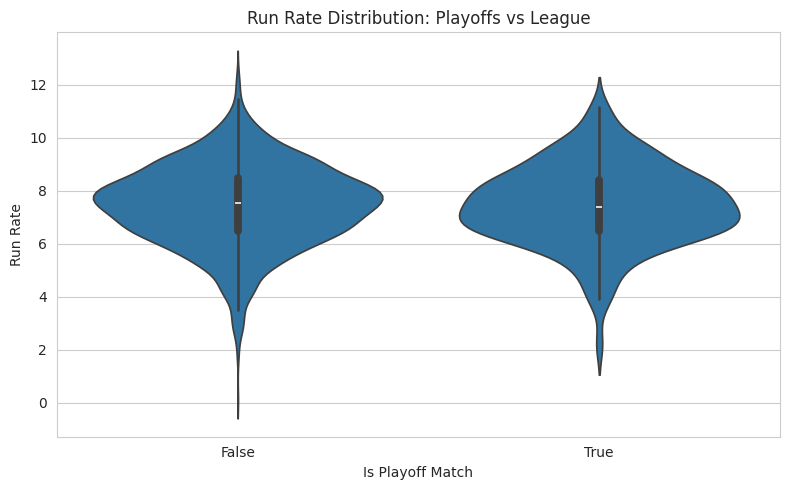

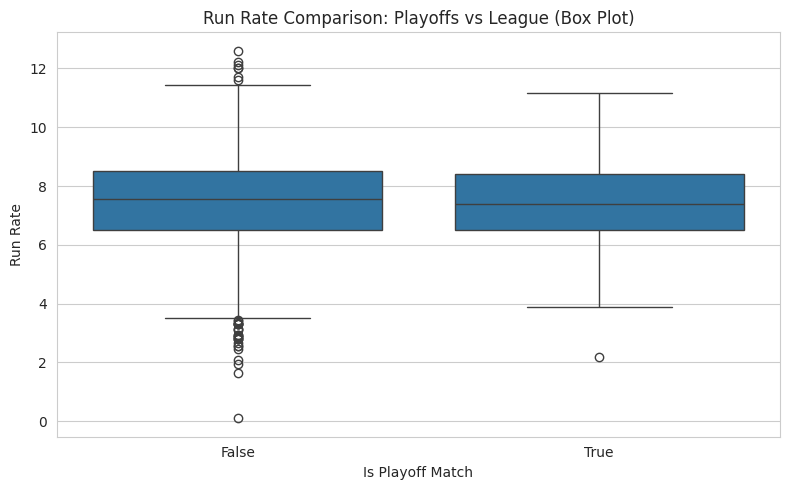

In [102]:
# Run Rate Trends in Playoff vs League Matches
plt.figure(figsize=(8, 5))
sns.violinplot(data=merged, x='is_playoff', y='run_rate')
plt.title("Run Rate Distribution: Playoffs vs League")
plt.xlabel("Is Playoff Match")
plt.ylabel("Run Rate")
plt.tight_layout()
plt.show()

# Box Plot: Run Rate Trends in Playoff vs League Matches
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged, x='is_playoff', y='run_rate')
plt.title("Run Rate Comparison: Playoffs vs League (Box Plot)")
plt.xlabel("Is Playoff Match")
plt.ylabel("Run Rate")
plt.tight_layout()
plt.show()

The graphs show how the total runs and run rate compare between regular league matches and playoff matches in the IPL.

**Run Rate Graph (Violin Plot):**
These plots show the distribution of run rates. The wider parts mean more matches had run rates in that range.

Again, the shapes and the typical run rates (often shown by a dot or line inside the violin) look very similar for both playoff and league matches.

**Conclusion:**

There doesn't seem to be a big visual difference in total runs or run rate between regular season games and playoff games.

Teams appear to score at a similar pace and total runs in both scenarios.

**Project Insights:**

Despite the higher stakes in playoff matches, major IPL teams like CSK, RCB, and KKR tend to maintain a consistent scoring tempo across league and playoff stages. Statistical tests confirm that the differences in run rate are not significant.

# **Mann-Whitney U: Team-wise Run Rate**

In [103]:
# Initialize a list to store results
results = []

# Loop through each unique team
for team in merged['batting_team'].unique():
    # Filter run rates for league and playoff matches
    league_run_rates = merged[(merged['batting_team'] == team) & (merged['is_playoff'] == False)]['run_rate']
    playoff_run_rates = merged[(merged['batting_team'] == team) & (merged['is_playoff'] == True)]['run_rate']

    # Proceed only if both league and playoff data are available
    if len(league_run_rates) >= 1 and len(playoff_run_rates) >= 1:
        stat, p_value = mannwhitneyu(league_run_rates, playoff_run_rates, alternative='two-sided')
        results.append({'Team': team, 'P-Value': p_value, 'Statistically Significant': 'Yes' if p_value < 0.05 else 'No'})
    else:
        results.append({'Team': team, 'P-Value': None, 'Statistically Significant': 'Insufficient data'})

# Convert results into DataFrame
teamwise_runrate_results = pd.DataFrame(results)

# Display the table sorted by p-value
teamwise_runrate_results.sort_values(by='P-Value', na_position='last')


,Team,P-Value,Statistically Significant
4,Delhi Daredevils,0.089151,No
7,Deccan Chargers,0.099655,No
2,Chennai Super Kings,0.332693,No
1,Royal Challengers Bangalore,0.433691,No
6,Mumbai Indians,0.434927,No
17,Lucknow Super Giants,0.479704,No
16,Gujarat Titans,0.497628,No
13,Rising Pune Supergiant,0.500000,No
3,Kings XI Punjab,0.659112,No
10,Sunrisers Hyderabad,0.716164,No


# **Home vs Away Analysis**

Why we need home vs away analysis:

1. Home advantage is a real phenomenon.
2. Scoring can be Pitch-Dependent.
3. Uncover hidden biases or trends.

These insights can help coaches, analysts and fans understand a team's true consistency.


In [104]:
# Home vs Away Analysis
merged['home_team'] = merged['batting_team'] == merged['team1']
merged['away_team'] = merged['batting_team'] == merged['team2']



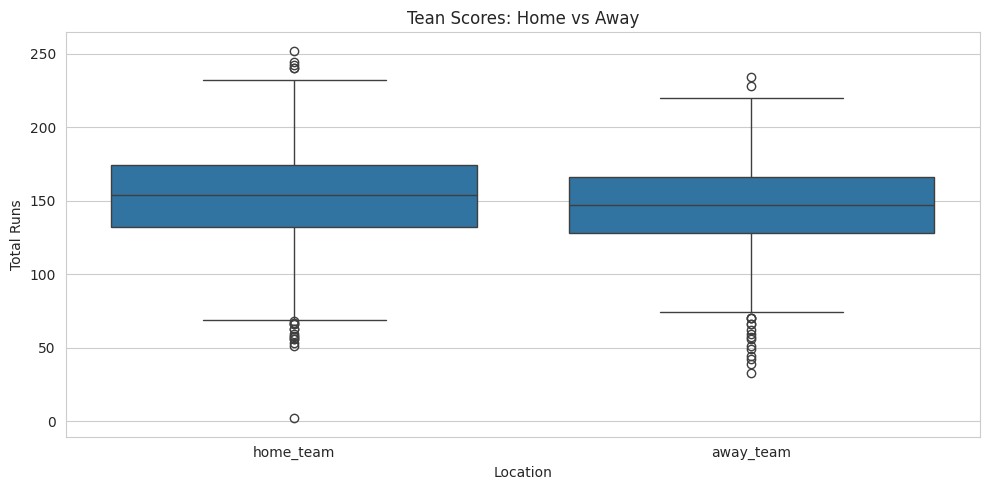

In [105]:
# Average runs for Home vs Away
# melt the dataset to reshape for home vs away comparison
# The melt operation
home_away_df = merged.melt(   # Reshapes the data.
    id_vars=['total_runs'],     # Keeps the total_runs column unchanged.
    value_vars=['home_team', 'away_team'],    # These two columns are converted into a single column named location.
    var_name='location',    # The name of the new column will be 'location' (contain either "home team" or "away team').
    value_name='is_true'    # The values in the new column will be True or false based on the original flags.
)

home_away_df = home_away_df[home_away_df['is_true']]
# Filters only valid home or away rows.
# keeps the row only if the team was actually the home team or away team, not both.

plt.figure(figsize=(10, 5))
sns.boxplot(data=home_away_df, x='location', y='total_runs')
plt.title("Tean Scores: Home vs Away")
plt.xlabel("Location")
plt.ylabel("Total Runs")
plt.tight_layout()
plt.show()

This picture shows two boxes.
*   The box on the left represents the scores when a team played at their home ground. The box on the right represents the scores when a team played away from their home ground.

*   The line inside each box is the average or median score. The boxes show where the middle scores fall. The lines sticking out (whiskers) show the range of most scores. Any dots are really high or low scores (outliers).

---

Looking at these two boxes:

**Similar Typical Scores:** The lines in the middle of both boxes seem to be at roughly the same height. This suggests that, on average, teams score about the same number of runs whether they are playing at home or away.

**Similar Spread of Scores:** The size (height) of both boxes and the length of the whiskers look quite similar. This means the variety in scores (how much they go up and down) is pretty much the same for both home and away matches.

**No Strong Home Advantage for Scoring:** Based just on this graph of scores, there doesn't appear to be a significant advantage in terms of scoring more runs when a team plays at home compared to when they play away.

---

This graph suggests that in the IPL, teams don't necessarily score more runs just because they are playing at their home ground. Their scoring seems to be quite consistent whether they are the home team or the away team.

# **Repeat of Playoff Identification**

In [106]:
# Ensure the date column is in datetime format
merged['date'] = pd.to_datetime(merged['date'])

# Extract year if not already extracted
merged['year'] = merged['date'].dt.year

# Sort the data by year and date to rank matches chronologically
merged = merged.sort_values(by=['year', 'date'])

# Assign match number within each season
merged['match_number'] = merged.groupby('year')['date'].rank(method='first').astype(int)

# Determine total number of matches per season
season_match_counts = merged.groupby('year')['match_number'].max().reset_index()
season_match_counts.rename(columns={'match_number': 'total_matches'}, inplace=True)

# Merge total match count back into main dataframe
merged = pd.merge(merged, season_match_counts, on='year', how='left')

# Define playoff matches: last 4 matches of each season
merged['is_playoff'] = merged['match_number'] > (merged['total_matches'] - 4)

In [107]:
#missing value analysis
print(merged.isnull().sum())
missing_percent=merged.isnull().mean()*100
print(missing_percent)
missing_rows=merged[merged.isnull().any(axis=1)]
print(missing_rows)
print(merged.isnull().any())

match_id         0
batting_team     0
total_runs       0
date             0
venue            0
team1            0
team2            0
Period           0
run_rate         0
year             0
is_playoff       0
home_team        0
away_team        0
match_number     0
total_matches    0
dtype: int64
match_id         0.0
batting_team     0.0
total_runs       0.0
date             0.0
venue            0.0
team1            0.0
team2            0.0
Period           0.0
run_rate         0.0
year             0.0
is_playoff       0.0
home_team        0.0
away_team        0.0
match_number     0.0
total_matches    0.0
dtype: float64
Empty DataFrame
Columns: [match_id, batting_team, total_runs, date, venue, team1, team2, Period, run_rate, year, is_playoff, home_team, away_team, match_number, total_matches]
Index: []
match_id         False
batting_team     False
total_runs       False
date             False
venue            False
team1            False
team2            False
Period           False
ru

# **Bar Chart: Avg Runs - League vs Playoff**

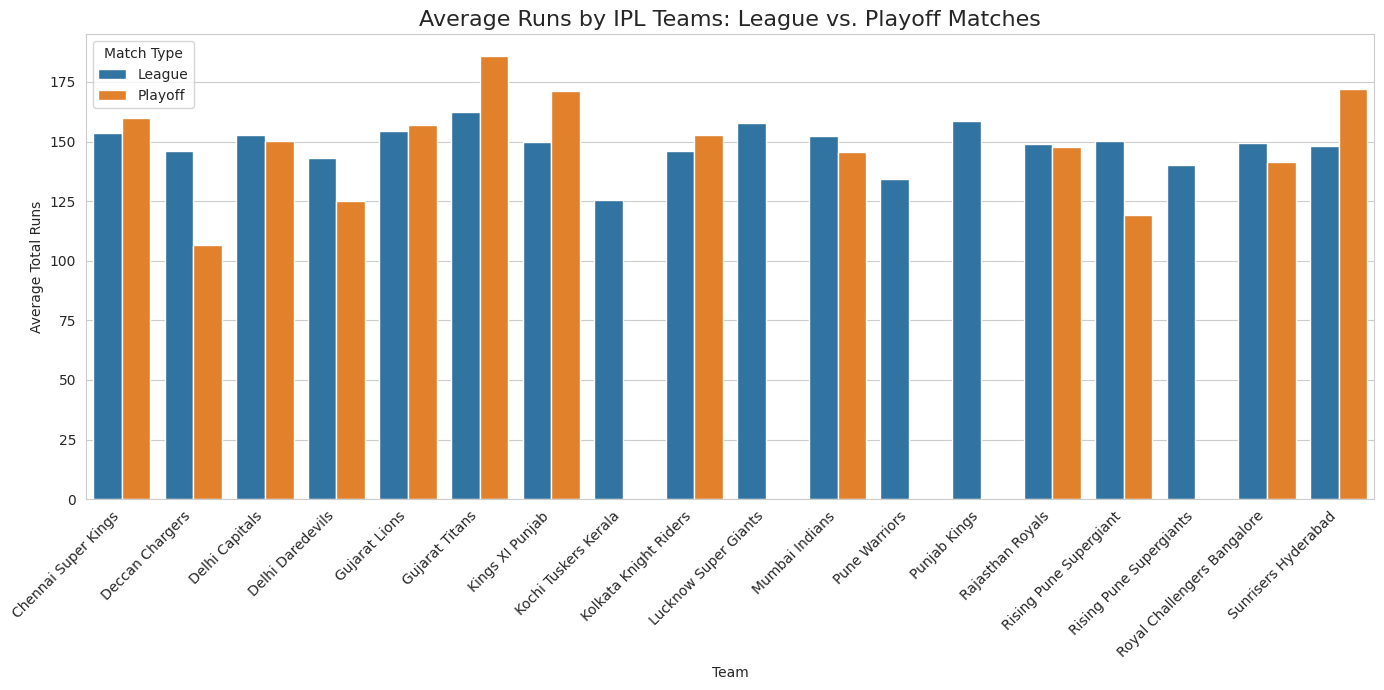

In [108]:
# Group by team and match type, then calculate average total runs
avg_runs = merged.groupby(['batting_team', 'is_playoff'])['total_runs'].mean().reset_index()

# Replace True/False with readable labels
avg_runs['Match Type'] = avg_runs['is_playoff'].replace({True: 'Playoff', False: 'League'})

# Rename for clarity
avg_runs.rename(columns={'batting_team': 'Team', 'total_runs': 'Average Runs'}, inplace=True)

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(data=avg_runs, x='Team', y='Average Runs', hue='Match Type')

# Chart formatting
plt.title('Average Runs by IPL Teams: League vs. Playoff Matches', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Total Runs')
plt.xlabel('Team')
plt.legend(title='Match Type')
plt.tight_layout()
plt.show()

This graph is a bar chart comparing how many runs each IPL team scores on average in two different situations: during the regular season (League Matches) and during the important playoff matches.

Each team has two bars next to each other: one for their average score in League games and one for their average score in Playoff games.

---

For most teams, the two bars (League and Playoff) are very close in height.

This suggests that, for the majority of teams, their average scoring doesn't change much when they go from playing in the regular league to playing in the high-pressure playoff games. They tend to score roughly the same number of runs on average in both types of matches.
But few teams like Gujarat Titans, Kings XI Punjab and Sunrisers Hyderabad score more in playoffs. On the other hand, teams like Deccan Chargers, Punjab Kings and Rising Pune Supergiant tend to score lower in playoffs. This suggests that some teams handle pressure better in high-stakes games.

---

Even though playoff matches are higher stakes, teams seem to maintain a similar scoring pace and ability. This indicates consistency in performance, at least in terms of total runs scored, regardless of the match's stage.

# **Bar Chart: Match Count - League vs Playoff**

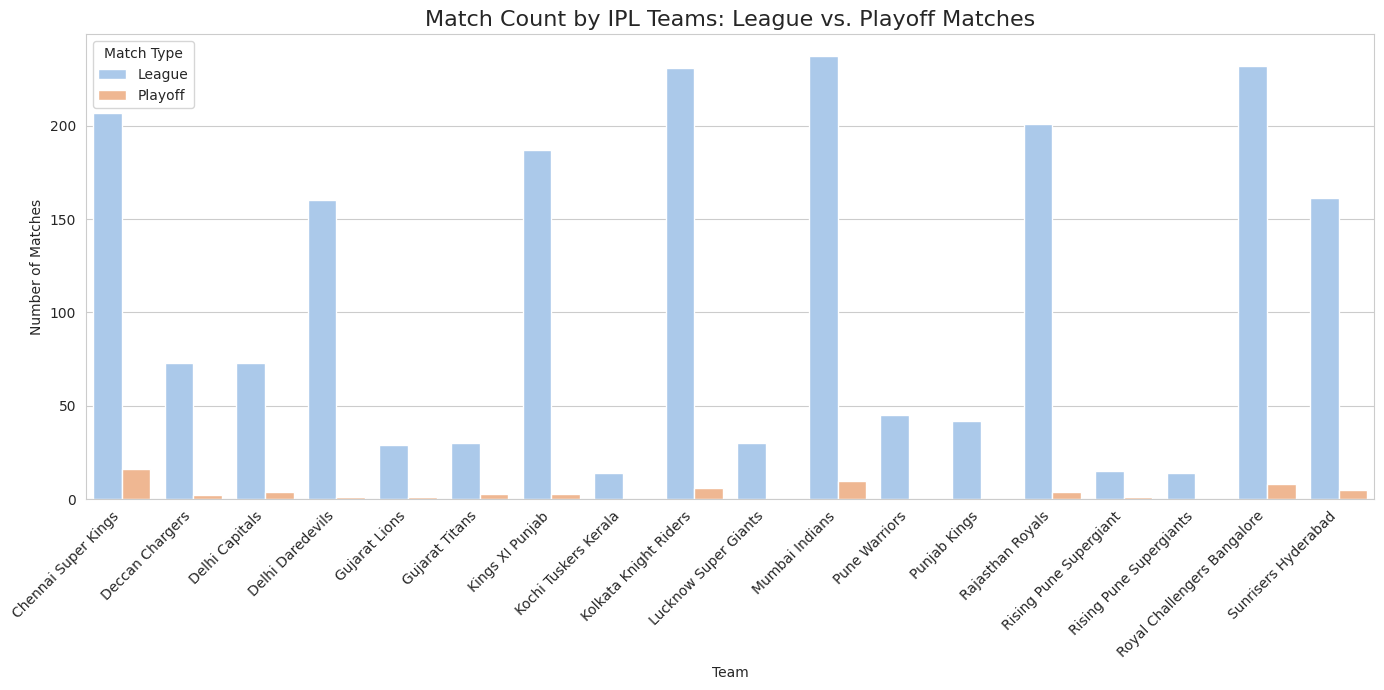

In [110]:
# Count number of matches played per team in league and playoff
match_counts = merged.groupby(['batting_team', 'is_playoff']).size().reset_index(name='Match Count')

# Replace True/False with 'Playoff'/'League'
match_counts['Match Type'] = match_counts['is_playoff'].replace({True: 'Playoff', False: 'League'})

# Rename for clarity
match_counts.rename(columns={'batting_team': 'Team'}, inplace=True)

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(data=match_counts, x='Team', y='Match Count', hue='Match Type', palette='pastel')

# Chart formatting
plt.title('Match Count by IPL Teams: League vs. Playoff Matches', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.legend(title='Match Type')
plt.tight_layout()
plt.show()

The chart shows that most IPL teams have played significantly more league matches than playoff matches. Only a few teams like Chennai Super Kings, Mumbai Indians, and Royal Challengers Bangalore have frequent playoff appearances, suggesting their consistent performance and qualification to later stages of the tournament over the years.

# **Filter Teams with ≥ 10 Matches (League & Playoff)**

In [111]:
# Count matches per team per match type
team_match_counts = merged.groupby(['batting_team', 'is_playoff']).size().unstack(fill_value=0)

# Rename columns for clarity
team_match_counts.columns = ['League', 'Playoff']

# Filter teams with at least 10 matches in both
qualified_teams = team_match_counts[(team_match_counts['League'] >= 10) & (team_match_counts['Playoff'] >= 10)]

# Display filtered teams
print("Teams with at least 10 matches in both League and Playoff:")
print(qualified_teams)

Teams with at least 10 matches in both League and Playoff:
                     League  Playoff
batting_team                        
Chennai Super Kings     207       16
Mumbai Indians          237       10


        batting_team Period  total_runs
7     Gujarat Titans   Post  164.333333
4   Delhi Daredevils   Post  160.714286
14    Mumbai Indians   Post  160.188889
8    Kings XI Punjab   Post  159.857143
17      Punjab Kings   Post  158.809524


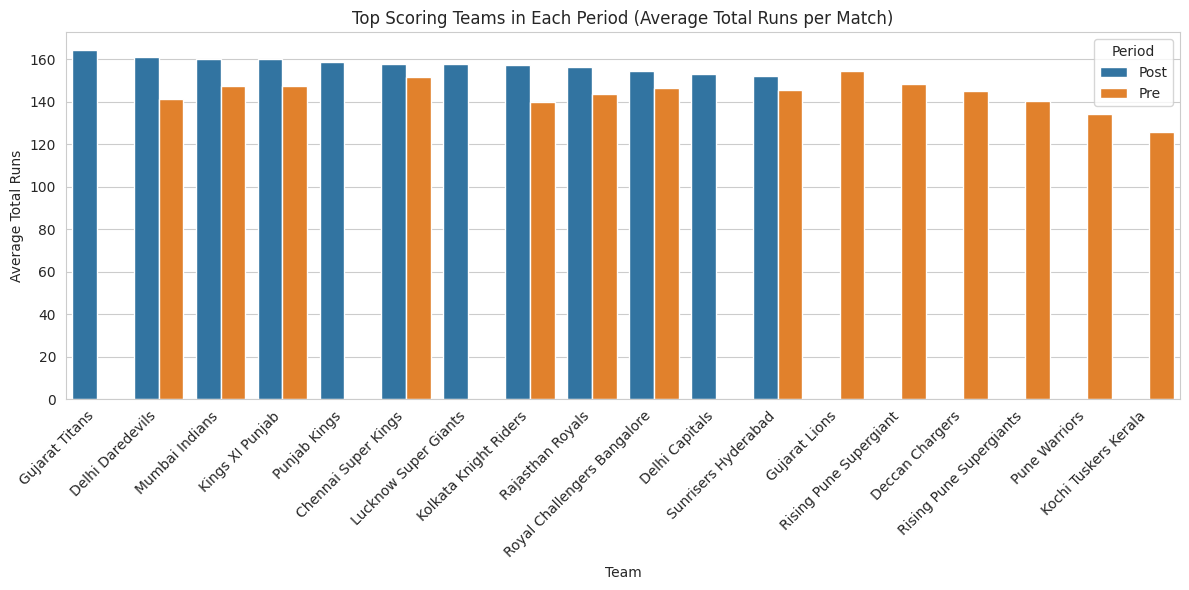

In [112]:
# Group by team and period to calculate average total runs per match
top_scoring_teams = (
    merged.groupby(['batting_team', 'Period'])['total_runs']
    .mean()
    .reset_index()
    .sort_values(by=['Period', 'total_runs'], ascending=[True, False])
)
print(top_scoring_teams.head())

# Plot the results using a barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_scoring_teams, x='batting_team', y='total_runs', hue='Period')

plt.title("Top Scoring Teams in Each Period (Average Total Runs per Match)")
plt.ylabel("Average Total Runs")
plt.xlabel("Team")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The table showing teams with at least 10 matches in both League and Playoff reveals that Chennai Super Kings and Mumbai Indians are the most experienced teams in high-pressure playoff games. While Mumbai Indians averaged higher runs in the League, Chennai Super Kings had a higher average in the Playoff matches (among these two teams). This suggests CSK might have performed better under playoff pressure in terms of scoring compared to MI, although the sample size for playoff matches is much smaller.

---

The graph shows which teams scored the most runs on average per match, comparing the early years of the IPL (Pre-2018) to the later years (Post-2018). While scoring generally increased across the league in the Post-2018 period, some teams consistently performed well or showed significant improvement.

---

**Overall Increase:** The bars for the 'Post' period are generally higher than the 'Pre' bars for most teams. This indicates that teams, on average, scored more runs per match in the later years of the IPL compared to the earlier years. This could be due to rule changes, better pitches, improved batting strategies, or stronger overall batting lineups.

**Consistent High Scorers:** Teams with tall bars in both 'Pre' and 'Post' periods were strong batting sides throughout IPL history.

**Improvement Over Time:** Some teams show a notable increase in average runs from the 'Pre' to the 'Post' period, suggesting they adapted well to the changing dynamics of the league or improved their batting performance.

---

From the graph and table, we can see that Gujarat Titans, Delhi Daredevils, and Mumbai Indians have the highest average scores in the post period, indicating strong batting performances in recent seasons. The overall trend suggests that many teams have maintained or improved their scoring rates post-restructuring, with Gujarat Titans leading the chart.

---

In simple terms, the IPL has generally become a higher-scoring league over time, and some teams have been consistently good at scoring runs, while others have improved significantly in the later years. The analysis also highlights which teams have the most experience in playoff matches and how their scoring might differ in those crucial games.

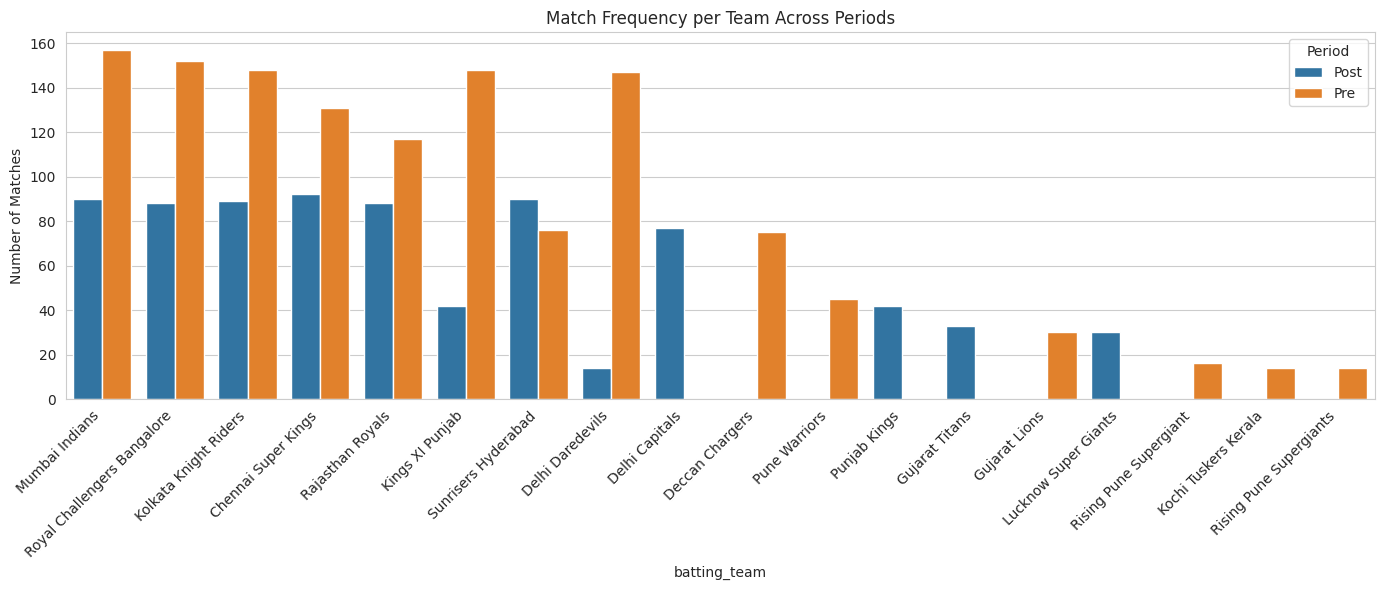

In [113]:
# Count number of matches played by each team in each period
match_counts = merged.groupby(['batting_team', 'Period']).size().reset_index(name='match_count')

# Sort teams by total matches to match visual order
team_order = match_counts.groupby('batting_team')['match_count'].sum().sort_values(ascending=False).index

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=match_counts, x='batting_team', y='match_count', hue='Period', order=team_order)

plt.title("Match Frequency per Team Across Periods")
plt.ylabel("Number of Matches")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This graph shows how many matches each IPL team played before 2018 (labeled 'Pre') and after 2018 (labeled 'Post'). Each team has two bars, one blue for the earlier period and one orange for the later period.


The most obvious conclusion is that all the older teams have played matches in both periods, but the number of matches played by each team is split between the 'Pre' and 'Post' periods. Some teams, like "Chennai Super Kings" and "Mumbai Indians", have played a significant number of matches in both periods, which shows the consistent participation in the league. New teams or teams that changed names/franchises might appear with matches concentrated in one period.

---

Looking at the two bars for each team. The sum of their heights is the total number of matches that team played across the entire dataset's history.

Compare the height of the blue bar ('Pre') to the orange bar ('Post') for a team. If the blue bar is taller, they played more matches before 2018. If the orange bar is taller, they played more matches after 2018. If the team wasn't active in one period, they will only have one bar.

Notice the teams with very tall combined bars (like Chennai Super Kings and Mumbai Indians) - these are teams that have been mainstays in the IPL for a long time and have played the most matches overall.

Mumbai Indians, RCB, KKR, and CSK have the highest match counts in both periods, reflecting their consistent participation throughout IPL history.

Teams like Gujarat Titans, Lucknow Super Giants, and Delhi Capitals have more matches in the Post period, indicating newer or rebranded franchises.


In [114]:
# Filter Teams with Low match counts
min_matches = 10
match_counts = (
    merged.groupby(['batting_team', 'Period'])['match_id']
    .nunique()
    .reset_index()
    .rename(columns={'match_id': 'match_count'})
)
match_counts_pivot = match_counts.pivot(index='batting_team', columns='Period', values='match_count').fillna(0)
qualified_teams=match_counts_pivot[
    (match_counts_pivot.get('Pre',0)>=min_matches) &
    (match_counts_pivot.get('Post',0)>=min_matches)
]
filtered_merges=merged[merged['batting_team'].isin(qualified_teams.index)]
print("Qualified teams: ",qualified_teams)
print("--------------------------------------------------------------------")
print("Filtered Dataset size", filtered_merges.shape)

Qualified teams:  Period                       Post    Pre
batting_team                            
Chennai Super Kings          92.0  131.0
Delhi Daredevils             14.0  147.0
Kings XI Punjab              42.0  148.0
Kolkata Knight Riders        89.0  148.0
Mumbai Indians               90.0  157.0
Rajasthan Royals             88.0  117.0
Royal Challengers Bangalore  88.0  152.0
Sunrisers Hyderabad          90.0   76.0
--------------------------------------------------------------------
Filtered Dataset size (1669, 15)


In [115]:
filtered_merges.head()

,match_id,batting_team,total_runs,date,venue,team1,team2,Period,run_rate,year,is_playoff,home_team,away_team,match_number,total_matches
0,335982,Kolkata Knight Riders,205,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Pre,10.25,2008,False,False,True,1,116
1,335982,Royal Challengers Bangalore,63,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Pre,3.15,2008,False,True,False,2,116
2,335983,Chennai Super Kings,234,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Pre,11.70,2008,False,False,True,3,116
3,335983,Kings XI Punjab,196,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Pre,9.80,2008,False,True,False,4,116
4,335984,Delhi Daredevils,122,2008-04-19,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Pre,6.10,2008,False,True,False,5,116


# **Line Plot: Avg Total Match Score by Season**

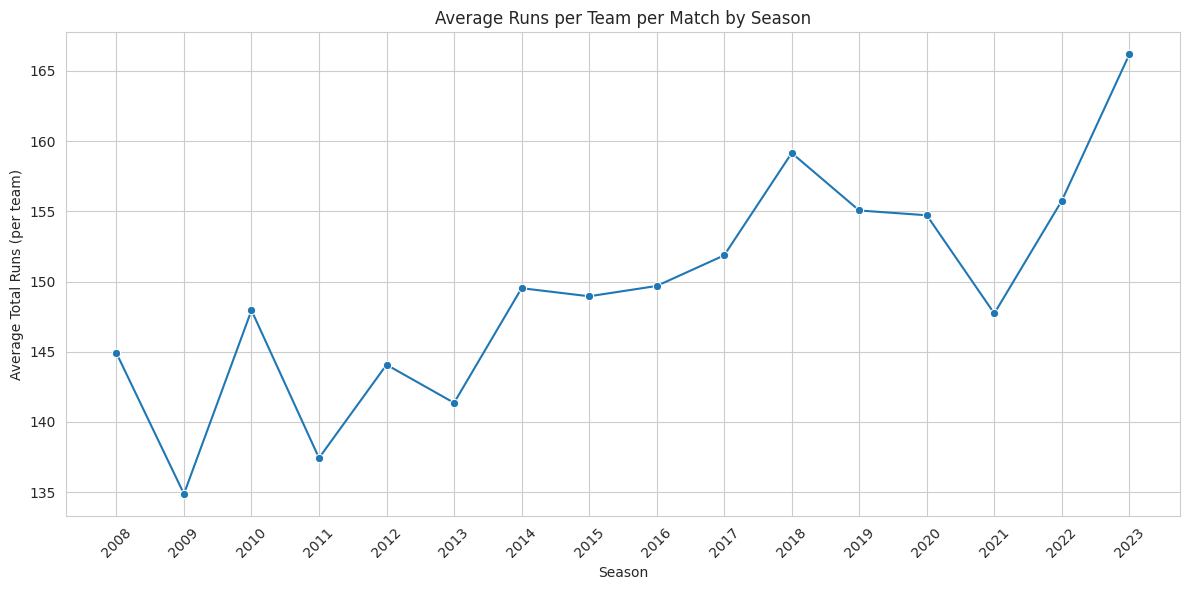

In [116]:
# Calculate total runs scored by each team in each match
match_totals = (
    merged.groupby(['match_id', 'batting_team'])['total_runs']
    .sum()
    .reset_index()
    .rename(columns={'total_runs': 'total_match_score'})
)

# Get match dates
match_info = match_info_data[['id', 'date']].copy()
match_info.rename(columns={'id': 'match_id'}, inplace=True)

# Merge match scores with dates
match_score = pd.merge(match_totals, match_info, on='match_id')

# Extract year
match_score['year'] = match_score['date'].dt.year

# Calculate average runs scored per team per match per year
seasonal_scores = (
    match_score.groupby('year')['total_match_score']
    .mean()
    .reset_index()
    .rename(columns={'total_match_score': 'avg_total_match_score'})
)

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonal_scores, x='year', y='avg_total_match_score', marker='o')
plt.title("Average Runs per Team per Match by Season")
plt.xlabel("Season")
plt.ylabel("Average Total Runs (per team)")
plt.xticks(seasonal_scores['year'], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Looking at the line plot:

**Overall Trend:** The line generally goes upwards from left to right, especially after the first few years. This means that, on average, teams have been scoring more runs per match over the seasons in the IPL.

The average score per team in a match has increased from around 150-160 runs in the early years to closer to 170-180 runs in recent seasons.

We can see some dips and peaks year-to-year, showing some seasons had slightly lower or higher scores than the general trend, but the overall direction is towards higher scores.

The IPL seems to be evolving into a higher-scoring league over time. This could be due to various factors like improved batting techniques, smaller grounds, pitch conditions, or strategic changes in how teams approach batting.




# **Line Plot: Team Avg Runs per Season**

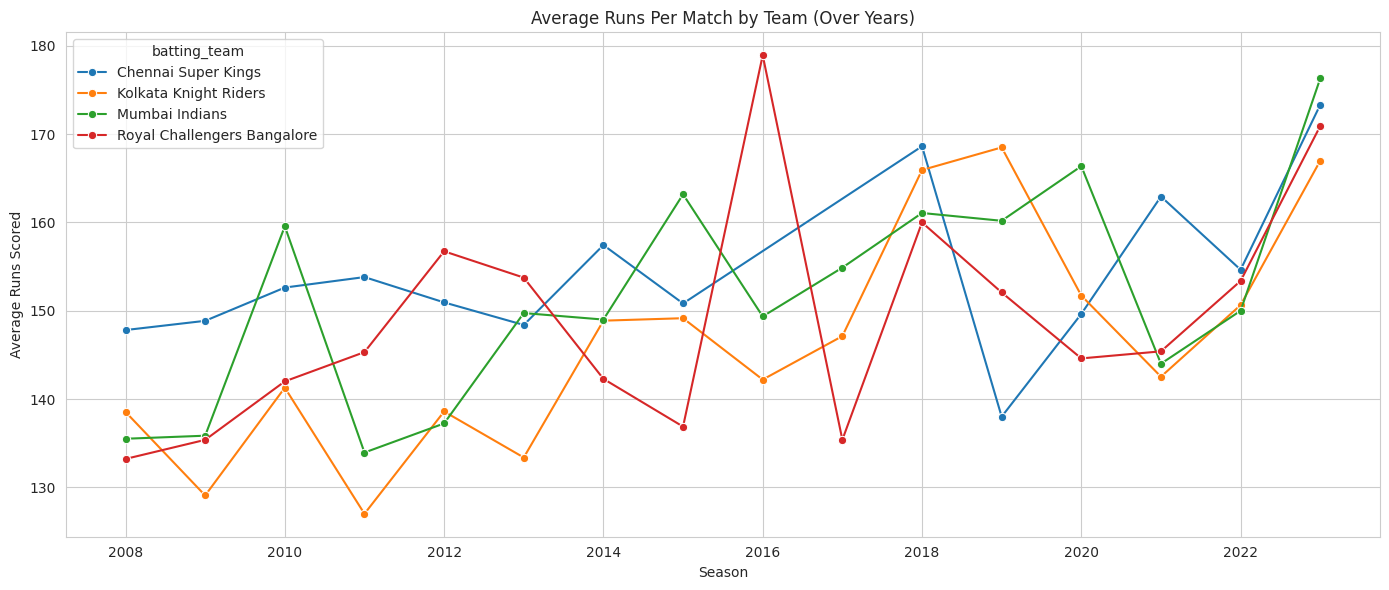

In [117]:
team_scores_by_year = (
    merged.groupby(['batting_team', 'year'])['total_runs']
    .mean()
    .reset_index()
    .rename(columns={'total_runs': 'avg_score'})
)

# Plot for a few major teams
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
top_teams = ['Chennai Super Kings', 'Mumbai Indians', 'Royal Challengers Bangalore', 'Kolkata Knight Riders']
sns.lineplot(
    data=team_scores_by_year[team_scores_by_year['batting_team'].isin(top_teams)],
    x='year', y='avg_score', hue='batting_team', marker='o'
)

plt.title("Average Runs Per Match by Team (Over Years)")
plt.xlabel("Season")
plt.ylabel("Average Runs Scored")
plt.grid(True)
plt.tight_layout()
plt.show()

The chart has years (IPL seasons) from 2008 onwards on the bottom (X-axis).
It has the average number of runs a team scored per match on the side (Y-axis).
Each colored line represents a specific IPL team (like Chennai Super Kings, Mumbai Indians, etc.).
The line goes up when a team's average score is increasing in that year, and goes down when it's decreasing.

---

The chart shows that the average runs scored by these top teams have changed over the years, sometimes going up and sometimes going down. There isn't a single simple pattern for all teams; their scoring performance varies from season to season.

---

**Fluctuating Performance:** Teams don't always score the same amount each year. There are good years and less good years for scoring runs.

**Team-Specific Trends:** You can see that different teams have different ups and downs. For example, one team's line might be generally going up while another's is more flat or spiky.

**No Consistent Improvement (for all teams):** While the previous chart showed the *league* average going up, this team-specific chart shows that individual teams don't necessarily improve their scoring consistently every single year. They have peak seasons and seasons where their average score is lower.

---
In short, the chart tells us that individual team scoring averages in the IPL aren't always smoothly increasing, but rather they go up and down depending on the season, showing that form and performance can vary from year to year even for the top teams.

# **Skewness, Kurtosis, Correlation Analysis**

Skewness:
match_id        -0.081515
total_runs      -0.316126
run_rate        -0.316126
year             0.039086
match_number     0.125165
total_matches    0.564029
dtype: float64

Kurtosis:
match_id        -1.562324
total_runs       0.597009
run_rate         0.597009
year            -1.234011
match_number    -1.009283
total_matches   -1.576544
dtype: float64


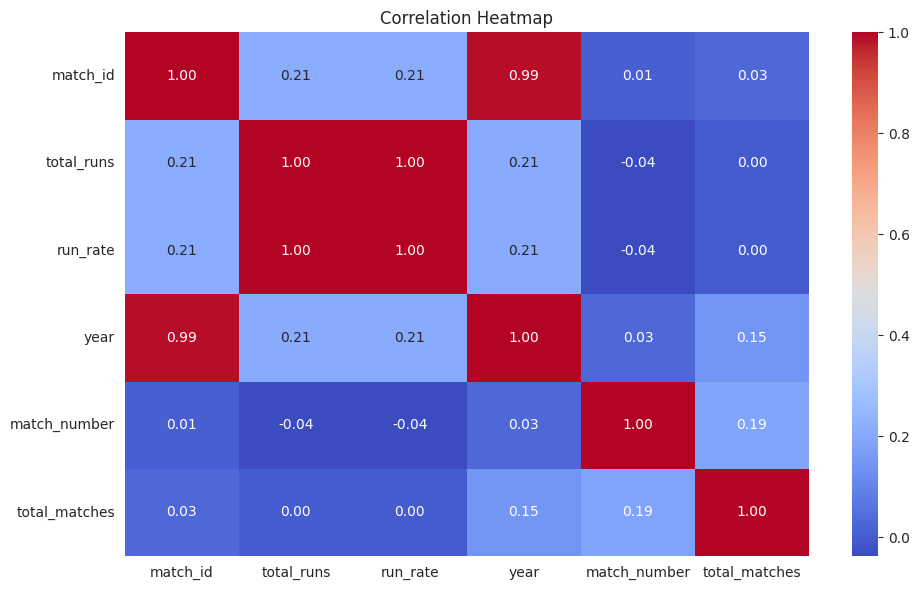

In [118]:
from scipy.stats import skew, kurtosis
# Select numerical columns for analysis
numeric_cols = merged.select_dtypes(include='number')

# Calculate Skewness
skewness = numeric_cols.apply(skew)
print("Skewness:")
print(skewness)

# Calculate Kurtosis
kurt = numeric_cols.apply(kurtosis)
print("\nKurtosis:")
print(kurt)

# Correlation Matrix
correlation_matrix = numeric_cols.corr()

# Plot Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

The squares in the grid have different colors.
**Blue/Purple:** Mean the two things being compared tend to go in opposite directions (when one goes up, the other goes down).

**Red/Orange:** Mean the two things being compared tend to go in the same direction (when one goes up, the other also goes up, or when one goes down, the other also goes down).

**White/Pale Colors:** Mean there's not much connection between the two things.

**Numbers:** The numbers inside the squares tell you how strong the connection is, from -1 (perfect opposite direction) to +1 (perfect same direction). 0 means no connection.

---

Look at the diagonal line of `1.00`. This is because everything is perfectly correlated with itself.

The `total_runs` row/column, seems `total_runs` has a positive but not super strong correlation with `year` (likely the light reddish color). This supports the earlier finding that scores have generally increased over time.

The `run_rate` also shows a strong positive correlation with `total_runs`.

`match_number` and `total_matches` will likely have some correlation, reflecting the structure of a season.

---

The heatmap confirms that scoring (`total_runs` and `run_rate`) has gone up slightly over the years (`year`).

It shows that the other numerical factors included in the heatmap (like `match_id`, `match_number`, `total_matches`) don't have a strong simple linear relationship with the total runs scored in a match. The factors influencing a team's score are more complex than just the year or which match number it is in a season.

# **Line Plot: League-Wide Avg Runs/Team/Match**

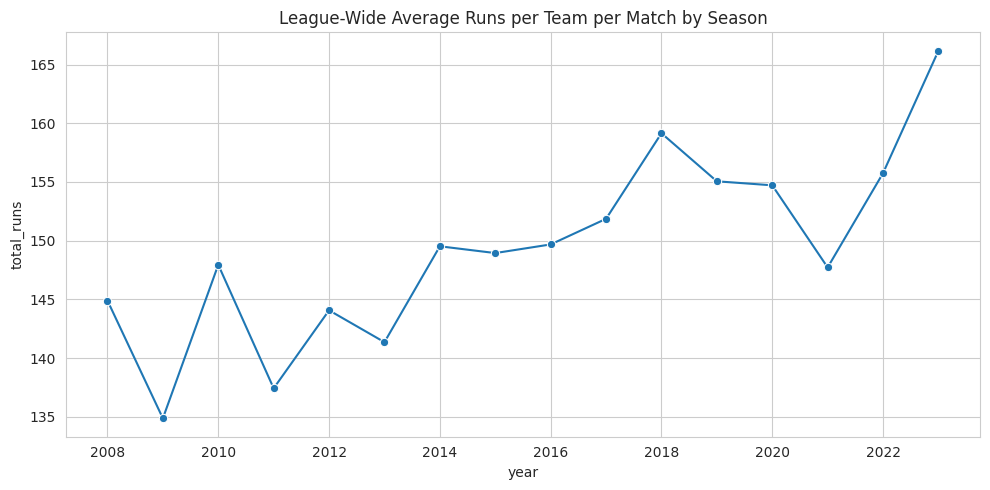

In [119]:
seasonal_avg = merged.groupby('year')['total_runs'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=seasonal_avg, x='year', y='total_runs', marker='o')
plt.title("League-Wide Average Runs per Team per Match by Season")
plt.grid(True)
plt.tight_layout()
plt.show()

This graph shows you the average number of runs a single team scores in a match, looking at all the teams together across every season from 2008 until recently.


**Scores have generally gone up:** The line on the graph starts lower on the left side (the early years) and mostly climbs upwards as you move to the right (the later years). This means that, on average, we're seeing more runs scored in IPL matches now compared to when the league first started.

So, while there might be small ups and downs from one year to the next, the overall picture is that IPL matches have gradually become higher-scoring affairs over the years.

# **Histogram + KDE: Total Runs by Period**

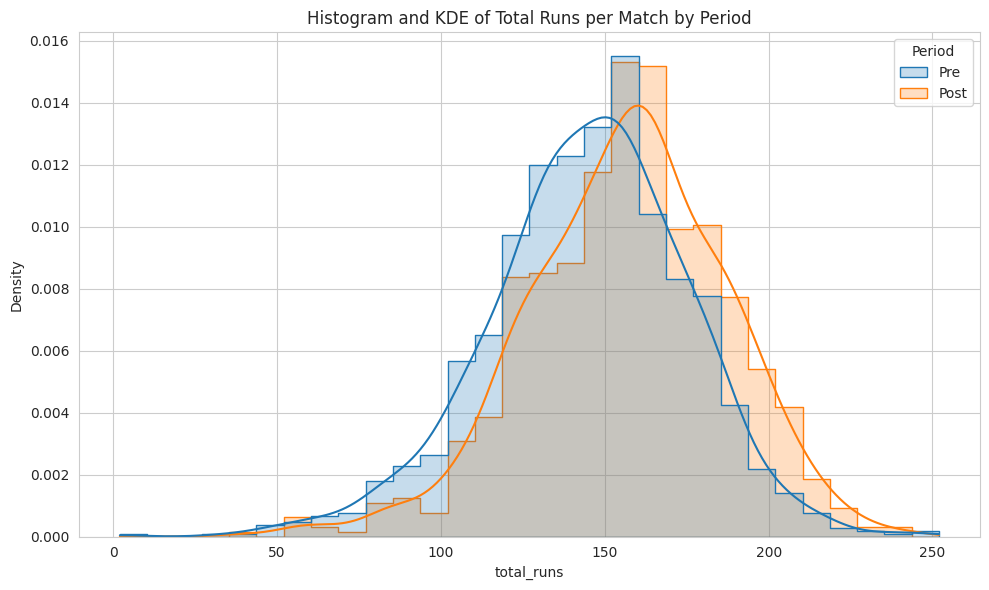

In [120]:
# Distribution Plots
plt.figure(figsize=(10, 6))
sns.histplot(data=merged, x='total_runs', hue='Period', element='step', stat='density',
             common_norm=False, kde=True, bins=30)
plt.title("Histogram and KDE of Total Runs per Match by Period")
plt.tight_layout()
plt.show()

Looking at the overall shape of the blue and orange distributions, they aren't perfectly bell-shaped (normal distribution), confirming what the Shapiro-Wilk test told us earlier - the run data isn't normally distributed. Both distributions look a bit skewed to the right, meaning there's a longer tail of matches with very high scores.

The orange distribution might appear a bit wider than the blue one, suggesting a slightly larger range or variability in scores in the later period.

**KDE Lines (the smooth curves):** These lines smooth out the histograms and give you a clearer picture of the overall shape and density of scores. The orange KDE line is clearly shifted to the right and might be a bit flatter and wider than the blue one, reinforcing the observations about higher average scores and potentially more variability.

---

The histogram and the smooth curves (KDE) visually confirm the trend we've seen in earlier line plots. The distribution of scores has shifted towards higher values in the period after 2018 compared to the period before 2018.


This visual evidence supports the idea that the IPL dynamic has changed, leading to higher run totals per match in recent seasons.

The shift isn't just about the highest scores; the entire distribution of scores has moved to the right, indicating that consistently higher scores are more common in the later period.

While not a formal test, the visual difference between the two distributions suggests that the 'Period' (Pre or Post 2018) has a noticeable impact on the typical total runs scored in a match.

# **Hypothesis Test + Cohen's d (Effect Size)**

# Hypothesis Testing: Mann-Whitney U Test

In [121]:
u_stat,p_val=mannwhitneyu(pre_scores,post_scores,alternative='two-sided')
print("Mann-whitney U Test : U-statistic=",u_stat,"p-value",p_val)

Mann-whitney U Test : U-statistic= 381621.5 p-value 1.454889995517028e-17


# Cohen's d

Cohen's d is a way to measure how big the difference is between two groups. It tells us how much one group differs from another in terms of standard deviation.

In [122]:
def cohen_d(x,y):
  nx=len(x)
  ny=len(y)
  dof=nx+ny-2
  pooled_std=np.sqrt(((nx-1)*np.std(x,ddof=1)**2+(ny-1)*np.std(y,ddof=1)**2)/dof)
  return (np.mean(x)-np.mean(y))/pooled_std
effect_size=cohen_d(post_scores,pre_scores)
print(effect_size)

0.3901739611740549


p-value is very close to zero, it clearly shows that there is a significant difference in match scores between the two periods

Cohen's d value is 0.39, which falls between 0.2 and 0.5, meaning the difference in match scores is considered small to moderate.

This means that although the increase in runs is statistically significant, the actual amount of increase is noticeable but not huge. Teams have been scoring more runs after 2018, but the difference per match is moderate, not massive.

# **Bootstrapping 95% CI: Runs Diff (League vs Playoff)**

Mean Difference: -3.80
95% Confidence Interval: (-11.39, 4.02)


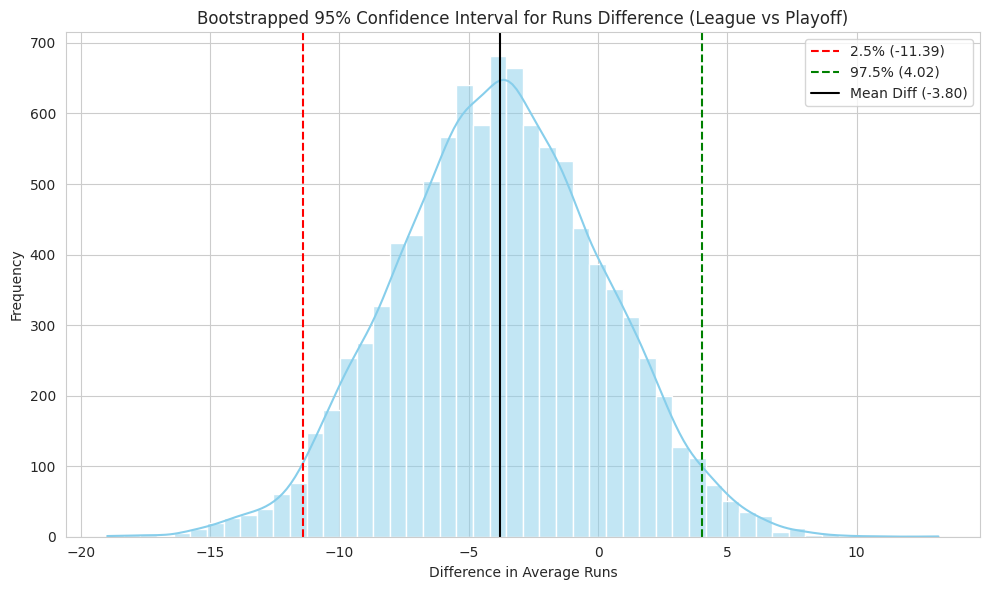

In [123]:
league_runs = merged[merged['is_playoff'] == False]['total_runs']
playoff_runs = merged[merged['is_playoff'] == True]['total_runs']
# Function to compute bootstrap sample means
def bootstrap_diff(league_data, playoff_data, n_bootstrap=10000):
    np.random.seed(42)
    boot_diffs = []
    for _ in range(n_bootstrap):
        boot_league = np.random.choice(league_data, size=len(league_data), replace=True)
        boot_playoff = np.random.choice(playoff_data, size=len(playoff_data), replace=True)
        boot_diffs.append(boot_league.mean() - boot_playoff.mean())
    return np.array(boot_diffs)

# Run bootstrapping
bootstrap_diffs = bootstrap_diff(league_runs.values, playoff_runs.values)

# Calculate 95% Confidence Interval
ci_lower = np.percentile(bootstrap_diffs, 2.5)
ci_upper = np.percentile(bootstrap_diffs, 97.5)
mean_diff = np.mean(bootstrap_diffs)

print(f"Mean Difference: {mean_diff:.2f}")
print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

# Plot distribution of bootstrap differences
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_diffs, bins=50, kde=True, color='skyblue')
plt.axvline(ci_lower, color='red', linestyle='--', label=f"2.5% ({ci_lower:.2f})")
plt.axvline(ci_upper, color='green', linestyle='--', label=f"97.5% ({ci_upper:.2f})")
plt.axvline(mean_diff, color='black', linestyle='-', label=f"Mean Diff ({mean_diff:.2f})")
plt.title("Bootstrapped 95% Confidence Interval for Runs Difference (League vs Playoff)")
plt.xlabel("Difference in Average Runs")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The mean difference in average runs between League and Playoff matches is about -3.80, meaning Playoff matches tend to have slightly fewer runs on average.

The 95% confidence interval is from -11.39 to 4.02.

Since this range includes 0, we cannot confidently say there's a significant difference in runs scored between League and Playoff matches.

# **Linear Regression: Avg Runs per Match Over Years**

In [124]:
# Linear Regression
seasonal_data = merged.groupby('year')['total_runs'].mean().reset_index()

X = sm.add_constant(seasonal_data['year'])  # Adding intercept to the model
y = seasonal_data['total_runs']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             total_runs   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     25.68
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           0.000172
Time:                        06:45:35   Log-Likelihood:                -47.087
No. Observations:                  16   AIC:                             98.17
Df Residuals:                      14   BIC:                             99.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2569.0983    536.414     -4.789      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


This linear regression model checks if total runs per match have increased over the years.

The R-squared value is 0.647, which means about 65% of the variation in total runs can be explained by the year.

The p-value for the year coefficient is very small (0.000), which tells us that the increase in runs over time is statistically significant. The coefficient for the year is 1.35, meaning that, on average, total runs per match increase by around 1.35 runs every year.
So overall, this analysis confirms a clear upward trend in scoring across seasons.

# **Regression: Team Scores Over Time (with Red Line)**

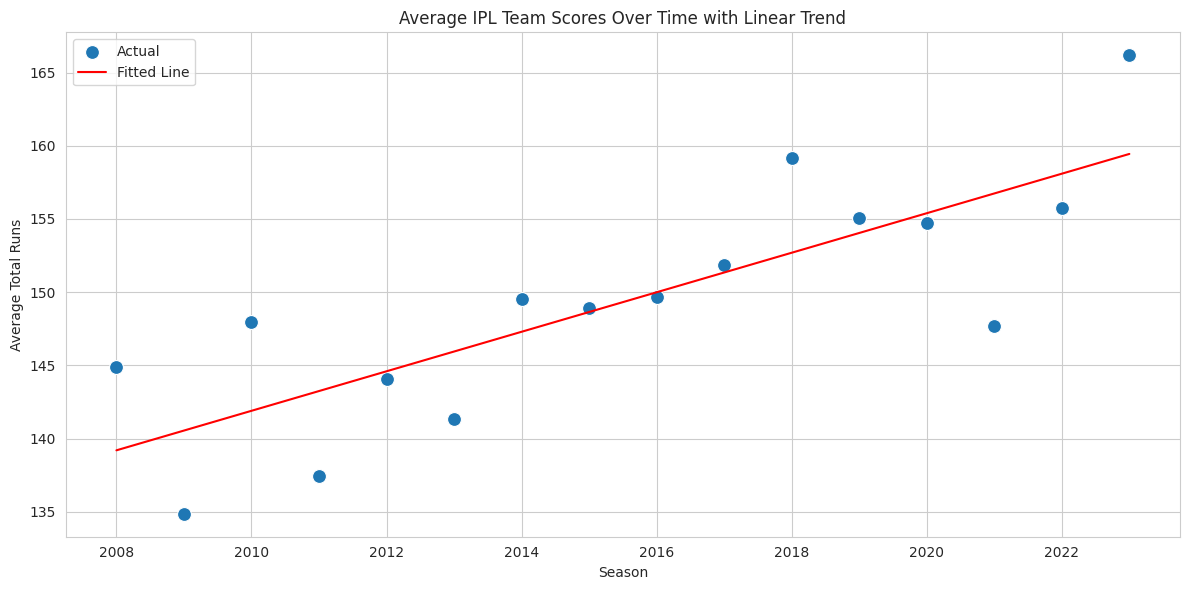

In [125]:
# Predict values using the model
seasonal_data['predicted'] = model.predict(X)

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
sns.scatterplot(data=seasonal_data, x='year', y='total_runs', label='Actual', s=100)
sns.lineplot(data=seasonal_data, x='year', y='predicted', label='Fitted Line', color='red')

plt.title("Average IPL Team Scores Over Time with Linear Trend")
plt.xlabel('Season')
plt.ylabel('Average Total Runs')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

This chart shows how average IPL team scores have changed over the years, along with a predicted trend line from a linear regression model.

The blue dots represent the actual average total runs scored by teams in each season, while the red line shows the predicted scores based on the trend. Overall, the red line slopes upward, meaning that scores have generally increased over time.

Although there are some ups and downs in actual scores, the fitted line suggests a clear upward trend in team performance.

---
---

# Final Conclusion

This project looked at IPL match data from 2008 to 2023 to see if and how team performance and scoring patterns have changed over the years, especially looking at differences between earlier and later periods, and between regular season and playoff matches.

---

What We Did

**Prepared the Data:** We combined information about matches and scores, making sure the dates were right and creating a new column to show if a match was before 2018 ("Pre") or after 2018 ("Post"). We also figured out which matches were playoffs.

**Checked Score Distributions:** We used tests and graphs to see the pattern of how scores were spread out. We found that the scores don't follow a simple, balanced pattern.

**Compared Scores:** We looked at whether teams scored differently in playoff games compared to regular league games using statistical tests and graphs.

**Looked at Scoring Trends:** We used graphs and a statistical method called linear regression to see if average scores were increasing over the years.

**Examined Team Performance:** We checked which teams scored the most on average and how their scoring changed over time.

---

**IPL is Becoming Higher Scoring:** The data clearly shows that, on average, teams score more runs per match in the later years of the IPL (after 2018) compared to the earlier years (before 2018). The average score per team has gone up by about 1.35 runs per season. This increase isn't massive for a single match, but it's a clear trend over time.

**Playoffs vs. Regular Season - Not Much Difference in Scoring:** Surprisingly, even though playoff matches have much higher stakes, teams don't seem to score significantly more or fewer runs on average in these games compared to regular league matches. Statistical tests and graphs showed similar scoring patterns and run rates in both types of matches.

**Individual Team Scoring Varies:** While the league average score is increasing, individual teams' average scores go up and down from season to season. This shows that a team's form and specific season performance play a big role, not just a general trend of scoring more over time.

**Experience in Playoffs Matters:** Teams like Chennai Super Kings and Mumbai Indians have played the most playoff matches, showing their consistent success over the years. While their average scores in playoffs are similar to the regular season overall, some teams might handle playoff pressure differently in terms of scoring.


---

Based on this analysis, the IPL has consistently evolved into a higher-scoring league since it began in 2008. Teams generally score more runs per match in recent years compared to the earlier ones. However, when it comes to the pressure of playoff matches, teams, on average, tend to score similarly to their regular season games. While the league-wide trend is clear (more runs over time), individual team performance and year-to-year variations are also significant factors in how many runs are scored.
